In [21]:
# Add Matplotlib inline magic command
%matplotlib notebook
%matplotlib inline
#importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as mtick
import plotly.io as pio
import plotly.graph_objects as go

In [22]:
#importing files
seriously_injured=pd.read_csv("../DB_Extracts/seriously_injured_data.csv",low_memory=False)

road_class=pd.read_csv("../DB_Extracts/road_class.csv")

In [23]:
#creating copy of data
df_seriously_injured=seriously_injured.copy()
df_road_class=road_class.copy()

In [24]:
pd.options.display.max_columns = None         # to print all columns

In [25]:
#Info about dataframe
df_seriously_injured.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 53 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ACCNUM           16860 non-null  int64  
 1   ObjectId         16860 non-null  int64  
 2   INVTYPE          16848 non-null  object 
 3   INVAGE           16860 non-null  object 
 4   INJURY_ID        15248 non-null  float64
 5   FATAL_NO         713 non-null    float64
 6   INITDIR          11966 non-null  object 
 7   VEHTYPE          14047 non-null  object 
 8   MANOEUVER        9627 non-null   object 
 9   DRIVACT          8462 non-null   object 
 10  DRIVCOND         8464 non-null   object 
 11  PEDTYPE          2786 non-null   object 
 12  PEDACT           2779 non-null   object 
 13  PEDCOND          2835 non-null   object 
 14  CYCLISTYPE       700 non-null    object 
 15  CYCACT           707 non-null    object 
 16  CYCCOND          706 non-null    object 
 17  PEDESTRIAN  

In [26]:
#find number of uniques in dataframe
df_seriously_injured.nunique()

ACCNUM              6002
ObjectId           16860
INVTYPE               18
INVAGE                21
INJURY_ID              5
FATAL_NO              78
INITDIR                5
VEHTYPE               27
MANOEUVER             16
DRIVACT               13
DRIVCOND              10
PEDTYPE               16
PEDACT                15
PEDCOND               10
CYCLISTYPE            22
CYCACT                11
CYCCOND               10
PEDESTRIAN             1
CYCLIST                1
AUTOMOBILE             1
MOTORCYCLE             1
TRUCK                  1
TRSN_CITY_VEH          1
EMERG_VEH              1
PASSENGER              1
SPEEDING               1
AG_DRIV                1
REDLIGHT               1
ALCOHOL                1
DISABILITY             1
YEAR                  15
DATE                3549
TIME                1311
HOUR                  24
STREET1             1714
STREET2             2567
OFFSET               419
ROAD_CLASS_ID         10
DISTRICT               5
WARDNUM               25


In [27]:
#Getting only Longitude and Latitude values in geometry2 column
import re
df_seriously_injured["geometry2"] = df_seriously_injured["geometry"].str.extract(r"\((.*?)\)")

In [28]:
# split geometry2 into two columns: long & Lat
df_seriously_injured[['Longitude', 'Latitude']] = df_seriously_injured['geometry2'].str.split(',', 1, expand=True)

In [29]:
#Standardize Lat & Long Length to match between the files
df_seriously_injured['Longitude']=df_seriously_injured.Longitude.map(lambda l: l[:8])
df_seriously_injured['Latitude']=df_seriously_injured.Latitude.map(lambda l: l[:8].replace(" ",''))
df_seriously_injured.drop(["geometry"],axis=1, inplace=True)

In [30]:
#Changing datatype to float for Latitude and Longitude columns
df_seriously_injured=df_seriously_injured.astype({'Longitude':'float','Latitude':'float'})

In [31]:
#Changing data type of DATE column to datetime
df_seriously_injured['DATE'] = pd.to_datetime(df_seriously_injured['DATE'])

In [32]:
#checking duplicate records
duplicates=df_seriously_injured[df_seriously_injured.ACCNUM.duplicated()]
duplicates

,ACCNUM,ObjectId,INVTYPE,INVAGE,INJURY_ID,FATAL_NO,INITDIR,VEHTYPE,MANOEUVER,DRIVACT,DRIVCOND,PEDTYPE,PEDACT,PEDCOND,CYCLISTYPE,CYCACT,CYCCOND,PEDESTRIAN,CYCLIST,AUTOMOBILE,MOTORCYCLE,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,YEAR,DATE,TIME,HOUR,STREET1,STREET2,OFFSET,ROAD_CLASS_ID,DISTRICT,WARDNUM,DIVISION,LOCCOORD,ACCLOC,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,ACCLASS,IMPACTYPE,POLICE_DIVISION,HOOD_ID,NEIGHBOURHOOD,geometry2,Longitude,Latitude
1,25301,16396,Pedestrian,65 to 69,4.0,NaN,East,NaN,NaN,NaN,NaN,Pedestrian hit at mid-block,"Crossing, no Traffic Control",Medical or Physical Disability,NaN,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,2020-01-04,1850,18,EGLINTON AVE E,BAYVIEW AVE,9 m North of,1.0,North York,15.0,53.0,Intersection,Intersection Related,Traffic Signal,Rain,Dark,Wet,Non-Fatal Injury,Pedestrian Collisions,D53,56,Leaside-Bennington (56),"-79.377116, 43.710967",-79.3771,43.7109
3,26294,16407,Driver,20 to 24,1.0,NaN,North,"Automobile, Station Wagon",Going Ahead,Driving Properly,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,2020-01-04,2214,22,256 JARVIS ST,NaN,GERRARD ST E,1.0,Toronto and East York,13.0,51.0,Mid-Block,Non Intersection,No Control,Clear,"Dark, artificial",Dry,Fatal,Pedestrian Collisions,D51,73,Moss Park (73),"-79.37556, 43.659568",-79.3755,43.6595
5,37330,16507,Pedestrian,75 to 79,4.0,NaN,North,NaN,NaN,NaN,NaN,Vehicle is going straight thru inter.while ped...,Crossing with right of way,Normal,NaN,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,2020,2020-01-06,1555,15,DUNDAS ST W,SHERIDAN AVE,6 m South of,3.0,Toronto East York,9.0,11.0,Intersection,At Intersection,Traffic Signal,Clear,"Dawn, artificial",Dry,Non-Fatal Injury,Pedestrian Collisions,D11,84,Little Portugal (84),"-79.43365, 43.649699",-79.4336,43.6496
7,45664,16514,Passenger,20 to 24,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,2020,2020-01-07,1850,18,EGLINTON AVE E,PHARMACY AVE,NaN,1.0,Scarborough,NaN,41.0,Intersection,At Intersection,Traffic Signal,Clear,Dark,Dry,Non-Fatal Injury,Turning Movement,D41,120,Clairlea-Birchmount (120),"-79.297481, 43.725577",-79.2974,43.7255
8,45664,16510,Driver,35 to 39,1.0,NaN,West,"Automobile, Station Wagon",Turning Left,Failed to Yield Right of Way,Inattentive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,2020,2020-01-07,1850,18,EGLINTON AVE E,PHARMACY AVE,NaN,1.0,Scarborough,NaN,41.0,Intersection,At Intersection,Traffic Signal,Clear,Dark,Dry,Non-Fatal Injury,Turning Movement,D41,120,Clairlea-Birchmount (120),"-79.297481, 43.725577",-79.2974,43.7255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16854,9002501134,16286,Passenger,15 to 19,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,2019,2019-12-28,1740,17,MARTIN GROVE RD,DIXON RD,NaN,1.0,Etobicoke York,NaN,23.0,Intersection,At Intersection,Traffic Signal,Clear,Dark,Dry,Non-Fatal Injury,Pedestrian Collisions,D23,1,West Humber-Clairville (1),"-79.570796, 43.691519",-79.5707,43.6915
16855,9002501134,16387,Pedestrian,50 to 54,4.0,NaN,Unknown,NaN,NaN,NaN,NaN,Vehicle turns left while ped crosses without R...,Crossing without right of way,Inattentive,NaN,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,2019,2019-12-28,1740,17,MARTIN GROVE RD,DIXON RD,NaN,1.0,Etobicoke York,NaN,23.0,Intersection,At Intersection,Traffic Signal,Clear,Dark,Dry,Non-Fatal Injury,Pedestrian Collisions,D23,1,West Humber-Clairville (1),"-79.570796, 43.691519",-79.5707,43.6915
16857,9085345312,15299,Driver,25 to 29,1.0,NaN,North,"Automobile, Station Wagon",Making U Turn,Driving Properly,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,

In [33]:
#Deleting Duplicates
df_seriously_injured=df_seriously_injured.drop_duplicates(subset=["ACCNUM"], keep="first")

In [34]:
# Group by year

In [35]:
fatal_year = df_seriously_injured.groupby('YEAR').ACCLASS.agg([
    ('All Collisions', len),
    ('Fatal Collisions', lambda x: (x == 'Fatal').sum()),
    ('Percent of Fatal Collisions', lambda x: (x == 'Fatal').mean())
    ]
)
fatal_year

,All Collisions,Fatal Collisions,Percent of Fatal Collisions
YEAR,,,
2006,481,57,0.118503
2007,453,47,0.103753
2008,417,51,0.122302
2009,438,45,0.102740
2010,400,42,0.105000
2011,399,34,0.085213
2012,453,44,0.097130
2013,431,63,0.146172
2014,350,51,0.145714


In [36]:
#collision by year

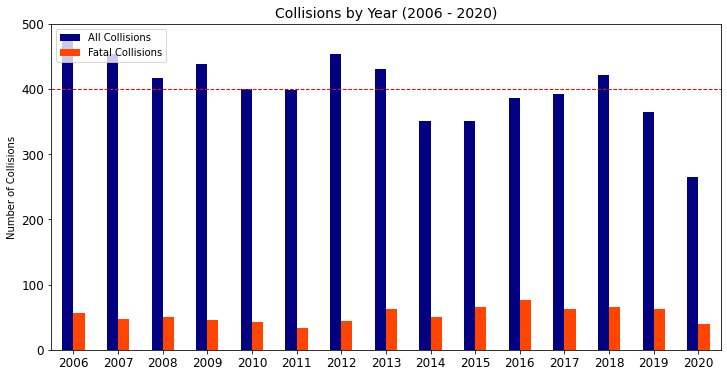

In [37]:
ax = fatal_year[['All Collisions', 'Fatal Collisions']].plot(
    kind='bar', 
    rot=0, 
    figsize=(12, 6), 
    color=['navy', 'orangered']
)

ax.set_title('Collisions by Year (2006 - 2020)', fontsize=14)
ax.set_ylabel('Number of Collisions')
ax.set_xlabel(' ')
ax.set_ylim([0, 500])
ax.legend(loc='upper left')

fmt = '{x:,.0f}'
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter(fmt))

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)

ax.axhline(fatal_year['All Collisions'].mean(), color='red', linestyle='dashed', linewidth=1)

pass

In [38]:
#Overall collision trend by year - plotly (figures as dictionaries)

In [39]:
fig = {
    "data": [{"type": "bar",
              "x": fatal_year.index,
              "y": fatal_year['All Collisions'],
              "name": "All",
              "marker_color": "rgb(0, 0, 128)",
              "hoverinfo": "y"
             },
             {"type": "bar",
              "x": fatal_year.index,
              "y": fatal_year['Fatal Collisions'],
              "name": "Severe",
              "marker_color": "rgb(255, 69, 0)",
              "hoverinfo": "y"
             }],
    "layout": {"title": {"text": "Collisions by Year (2009 - 2018)", "font_size": 20},
               "xaxis": {"tickfont_size": 12, 
                         "type": "category"},
               "yaxis": {"title": "Number of Collisions",  
                         "tickfont_size": 12},
               "barmode": "group",
               "bargap": 0.25,
               "bargroupgap": 0.1,
               "plot_bgcolor": "#F5F5F5"
              }
}

pio.show(fig)

In [40]:
#Overall collision trend by year - plotly with plot control (figures as graph objects)

In [42]:
data = [fatal_year[i] for i in ['All Collisions', 'Fatal Collisions']]
names = ["Collisions", "Fatal Collisions"]
colors = ["rgb(0,0,128)", "rgb(255, 69, 0)"]
plot_data = zip(data, names, colors)

# Create figures and annotations
fig = go.Figure()
annotation_list = []

for item in plot_data:
    fig.add_trace(
    go.Scatter(
        x=fatal_year.index,
        y=item[0],
        name=item[1],
        marker_color=item[2]),
)
    
    annotation_text = "{:,.0f} {} <br> happend in {}".format(
        item[0].max(),
        item[1],
        item[0].idxmax())

    annotation = [
        dict(
            x=item[0].idxmax(),
            y=item[0].max(),
            xref="x", yref="y",
            text=annotation_text,
            ax=0, 
            ay=-40)]

    annotation_list.append(annotation)

# Create drop-downs and plot
fig.update_layout(
    updatemenus=[
        go.layout.Updatemenu(
            active=0,
            buttons=list([
                dict(label="All Collisions",
                     method="update",
                     args=[{"visible": [True, False]},
                           {"title": "All Collisions from 2006 to 2020",
                            "annotations": annotation_list[0]}]),
                dict(label="Severe Collisions",
                     method="update",
                     args=[{"visible": [False, True]},
                           {"title": "Severe Collisions from 2006 to 2020",
                            "annotations": annotation_list[1]}])]),
            bordercolor="rgb(192,192,192)",
            x=1,
            xanchor="right",
            y=1.12,
            yanchor="top"
        )],
    plot_bgcolor="#F5F5F5",
    legend_orientation="h",
    title_text="Collisions by Year (2006 - 2020)")

In [43]:
# bike & ped collision
def bike_ped(row):
    if (row.CYCLIST == 'Yes') | (row.PEDESTRIAN == 'Yes'):
        return 'YES'
    else:
        return 'NULL'
df_seriously_injured['BIKE_PED_COLLISION'] = df_seriously_injured.apply(bike_ped, axis=1)

In [44]:
df_seriously_injured.head()

,ACCNUM,ObjectId,INVTYPE,INVAGE,INJURY_ID,FATAL_NO,INITDIR,VEHTYPE,MANOEUVER,DRIVACT,DRIVCOND,PEDTYPE,PEDACT,PEDCOND,CYCLISTYPE,CYCACT,CYCCOND,PEDESTRIAN,CYCLIST,AUTOMOBILE,MOTORCYCLE,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,YEAR,DATE,TIME,HOUR,STREET1,STREET2,OFFSET,ROAD_CLASS_ID,DISTRICT,WARDNUM,DIVISION,LOCCOORD,ACCLOC,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,ACCLASS,IMPACTYPE,POLICE_DIVISION,HOOD_ID,NEIGHBOURHOOD,geometry2,Longitude,Latitude,BIKE_PED_COLLISION
0,25301,16392,Driver,75 to 79,1.0,NaN,North,"Automobile, Station Wagon",Going Ahead,Driving Properly,Normal,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,2020-01-04,1850,18,EGLINTON AVE E,BAYVIEW AVE,9 m North of,1.0,North York,15.0,53.0,Intersection,Intersection Related,Traffic Signal,Rain,Dark,Wet,Non-Fatal Injury,Pedestrian Collisions,D53,56,Leaside-Bennington (56),"-79.377116, 43.710967",-79.3771,43.7109,YES
2,26294,16402,Pedestrian,65 to 69,2.0,1.0,East,NaN,NaN,NaN,NaN,Pedestrian hit at mid-block,"Crossing, no Traffic Control",Unknown,NaN,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,2020-01-04,2214,22,256 JARVIS ST,NaN,GERRARD ST E,1.0,Toronto and East York,13.0,51.0,Mid-Block,Non Intersection,No Control,Clear,"Dark, artificial",Dry,Fatal,Pedestrian Collisions,D51,73,Moss Park (73),"-79.37556, 43.659568",-79.3755,43.6595,YES
4,37330,16506,Driver,50 to 54,1.0,NaN,West,"Automobile, Station Wagon",Going Ahead,Failed to Yield Right of Way,Normal,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,2020,2020-01-06,1555,15,DUNDAS ST W,SHERIDAN AVE,6 m South of,3.0,Toronto East York,9.0,11.0,Intersection,At Intersection,Traffic Signal,Clear,"Dawn, artificial",Dry,Non-Fatal Injury,Pedestrian Collisions,D11,84,Little Portugal (84),"-79.43365, 43.649699",-79.4336,43.6496,YES
6,45664,16513,Driver,50 to 54,5.0,NaN,East,"Automobile, Station Wagon",Going Ahead,Driving Properly,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,2020,2020-01-07,1850,18,EGLINTON AVE E,PHARMACY AVE,NaN,1.0,Scarborough,NaN,41.0,Intersection,At Intersection,Traffic Signal,Clear,Dark,Dry,Non-Fatal Injury,Turning Movement,D41,120,Clairlea-Birchmount (120),"-79.297481, 43.725577",-79.2974,43.7255,NULL
9,56815,16515,Driver,45 to 49,1.0,NaN,South,Delivery Van,Going Ahead,Disobeyed Traffic Control,Inattentive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Yes,Yes,Yes,NaN,NaN,2020,2020-01-09,1100,11,MARTIN GROVE RD,BELFIELD RD,NaN,1.0,Etobicoke York,1.0,23.0,Intersection,At Intersection,Traffic Signal,Clear,Daylight,Dry,Non-Fatal Injury,Angle,D23,1,West Humber-Clairville (1),"-79.575588, 43.701876",-79.5755,43.7018,NULL


In [ ]:
#Bike & ped collisions by year

In [46]:
bp_collision = df_seriously_injured[df_seriously_injured.BIKE_PED_COLLISION=='YES'][['YEAR', 'BIKE_PED_COLLISION', 'ACCLASS']]
bp_collision = bp_collision.groupby('YEAR').agg({
    'BIKE_PED_COLLISION': 'count',
    'ACCLASS': lambda x: (x=='Fatal').sum()
    }
)

bp_collision['Percent BP Fatal Collisions'] = bp_collision.ACCLASS / bp_collision.BIKE_PED_COLLISION
bp_collision.rename(columns={
    'BIKE_PED_COLLISION': 'Bike & Ped Collision',
    'ACCLASS': 'Fatal Collisions'
    }, inplace=True
)

bp_collision

,Bike & Ped Collision,Fatal Collisions,Percent BP Fatal Collisions
YEAR,,,
2006,267,33,0.123596
2007,226,25,0.110619
2008,223,28,0.125561
2009,245,32,0.130612
2010,227,22,0.096916
2011,240,20,0.083333
2012,274,27,0.098540
2013,273,46,0.168498
2014,191,34,0.178010


In [47]:
# Concatenate with all collisions
collision_compare = pd.concat([bp_collision, fatal_year], axis=1)
collision_compare

,Bike & Ped Collision,Fatal Collisions,Percent BP Fatal Collisions,All Collisions,Fatal Collisions,Percent of Fatal Collisions
YEAR,,,,,,
2006,267,33,0.123596,481,57,0.118503
2007,226,25,0.110619,453,47,0.103753
2008,223,28,0.125561,417,51,0.122302
2009,245,32,0.130612,438,45,0.102740
2010,227,22,0.096916,400,42,0.105000
2011,240,20,0.083333,399,34,0.085213
2012,274,27,0.098540,453,44,0.097130
2013,273,46,0.168498,431,63,0.146172
2014,191,34,0.178010,350,51,0.145714


In [48]:
fig = {
    "data": [{"type": "scatter",
              "x": collision_compare.index,
              "y": collision_compare['Percent BP Fatal Collisions'],
              "name": "% Severe bike & ped collisions",
              "marker_color": "rgb(250, 128, 114)",
              "hoverinfo": "y"
             },
             {"type": "scatter",
              "x": collision_compare.index,
              "y": collision_compare['Percent of Fatal Collisions'],
              "name": "% Severe collisions",
              "marker_color": "rgb(255, 165, 0)",
              "hoverinfo": "y"
             }],
    "layout": {"title": {"text": "Percent of Severe Collisions by Year (2006 - 2020)", "font_size": 20},
               "xaxis": {"tickfont_size": 12, 
                         "type": "category"},
               "yaxis": {"title": "Ratio",  
                         "tickfont_size": 12,
                         "tickformat": ",.0%"},
               "barmode": "group",
               "bargap": 0.25,
               "bargroupgap": 0.1,
               "legend_orientation": "h"
              }
}

pio.show(fig)

In [ ]:
#Collision by Day of Week

In [49]:
#Extracting Week from Date
df_seriously_injured["Day_of_Week"]=df_seriously_injured["DATE"].dt.day_name()

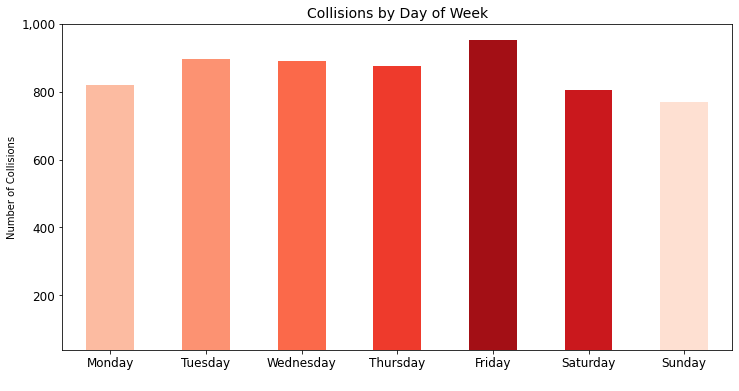

In [50]:
collision_dow = pd.Series(df_seriously_injured.groupby('Day_of_Week').count()['ACCNUM'])
collision_dow = collision_dow.reindex([
    'Monday', 
    'Tuesday', 
    'Wednesday', 
    'Thursday', 
    'Friday', 
    'Saturday', 
    'Sunday'
])

pal = sns.color_palette('Reds', 7) 
colordict = {
    'Friday': pal[6],
    'Saturday': pal[5],
    'Thursday': pal[4],
    'Wednesday': pal[3],
    'Tuesday': pal[2],
    'Sunday': pal[0],
    'Monday': pal[1]
}

ax = collision_dow.plot(figsize=(12, 6), kind='bar', color=[colordict[i] for i in collision_dow.index], width=0.5, rot=0)

ax.set_title('Collisions by Day of Week', fontsize=14)
ax.set_ylim((40, 1000))
ax.set_ylabel('Number of Collisions')
ax.set_xlabel(' ')

fmt = '{x:,.0f}'
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter(fmt))

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)
    
    
pass

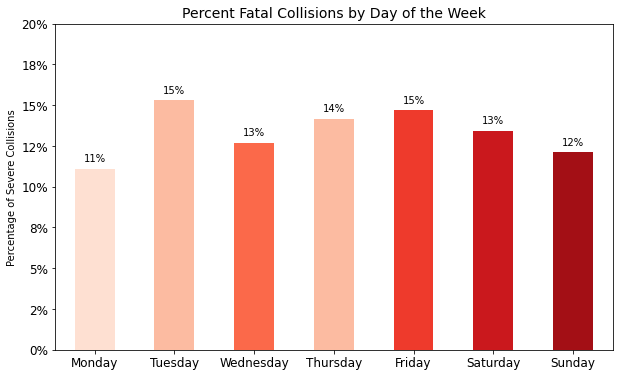

In [51]:
severe_collision_dow = pd.Series(df_seriously_injured.groupby('Day_of_Week')['ACCLASS'].agg(lambda x: (x == 'Fatal').mean()))
severe_collision_dow = severe_collision_dow.reindex([
    'Monday', 
    'Tuesday', 
    'Wednesday', 
    'Thursday', 
    'Friday', 
    'Saturday', 
    'Sunday'
])

pal = sns.color_palette("Reds", 7) 
colordict = {'Friday': pal[4],
             'Saturday': pal[5],
             'Thursday': pal[1],
             'Wednesday': pal[3],
             'Tuesday': pal[1],
             'Sunday': pal[6],
             'Monday': pal[0]}

ax = severe_collision_dow.plot(figsize=(10, 6), kind='bar', color=[colordict[i] for i in severe_collision_dow.index], width=0.5, rot=0)

ax.set_title('Percent Fatal Collisions by Day of the Week', fontsize=14)
ax.set_ylabel('Percentage of Severe Collisions')
plt.ylim([0, 0.2])
ax.set_xlabel(' ')

fmt = '{x:,.0%}'
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter(fmt))

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)
    
    
for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 5
    va = 'bottom'
    label = '{:.0%}'.format(y_value)
    ax.annotate(label,
                 (x_value, y_value),
                 xytext=(0, space),
                 textcoords='offset points',
                 ha='center',
                 va=va)

pass

In [ ]:
#Let's bring in time of day

In [52]:
collision_dow_hod = df_seriously_injured.groupby(['HOUR', 'Day_of_Week'])['ACCNUM'].count().unstack()
collision_dow_hod = collision_dow_hod[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

temp = df_seriously_injured[(df_seriously_injured.ACCLASS=='Fatal')]
collision_dow_hod_severe = temp.groupby(['HOUR', 'Day_of_Week'])['ACCNUM'].count().unstack()
collision_dow_hod_severe = collision_dow_hod_severe[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

data = [collision_dow_hod, collision_dow_hod_severe]
title = [
    'Collision by Day of Week and Time of Day', 
    'Severe Collisions by Day of Week and Time of Day'
]
chart_data = zip(data, title)

for item in chart_data:
    
    fig = {
        "data": [{"type": "heatmap",
                  "x": item[0].columns,
                  "y": item[0].index,
                  "z": item[0].values.tolist(),
                 }],
        "layout": {"title": {"text": item[1], "font_size": 20},
                   "xaxis": {"title": "Day of Week",
                             "tickfont_size": 12, 
                             "type": "category"},
                   "yaxis": {"title": "Hour of Day",  
                             "tickfont_size": 12,
                             "type": "category"},
                   "height": 650
                  }
    }

    pio.show(fig)

# Collisions by type

In [53]:
# by year
t1 = df_seriously_injured.groupby(['YEAR', 'IMPACTYPE'])['ACCNUM'].count().unstack()
t1

IMPACTYPE,Angle,Approaching,Cyclist Collisions,Other,Pedestrian Collisions,Rear End,SMV Other,SMV Unattended Vehicle,Sideswipe,Turning Movement
YEAR,,,,,,,,,,
2006,31.0,24.0,52.0,3.0,213.0,28.0,61.0,6.0,12.0,51.0
2007,35.0,23.0,37.0,1.0,186.0,37.0,52.0,6.0,11.0,65.0
2008,26.0,29.0,40.0,4.0,183.0,35.0,40.0,2.0,14.0,44.0
2009,23.0,16.0,39.0,3.0,201.0,40.0,44.0,6.0,9.0,57.0
2010,25.0,11.0,41.0,4.0,181.0,30.0,34.0,9.0,10.0,55.0
2011,13.0,10.0,52.0,2.0,186.0,43.0,42.0,2.0,10.0,39.0
2012,24.0,9.0,70.0,9.0,201.0,32.0,48.0,7.0,5.0,48.0
2013,14.0,14.0,64.0,6.0,205.0,21.0,36.0,4.0,11.0,56.0
2014,13.0,14.0,45.0,6.0,146.0,18.0,39.0,2.0,14.0,53.0


In [54]:
# by weather type
t2 = df_seriously_injured.groupby(['IMPACTYPE', 'VISIBILITY'])['ACCNUM'].count().unstack()
t2.drop(['Clear'], axis=1, inplace=True)
t2

VISIBILITY,Drifting Snow,"Fog, Mist, Smoke, Dust",Freezing Rain,Other,Rain,Snow,Strong wind
IMPACTYPE,,,,,,,
Angle,NaN,NaN,1.0,3.0,27.0,6.0,NaN
Approaching,2.0,2.0,1.0,1.0,21.0,17.0,NaN
Cyclist Collisions,1.0,NaN,NaN,3.0,48.0,2.0,NaN
Other,NaN,NaN,NaN,7.0,5.0,1.0,NaN
Pedestrian Collisions,3.0,7.0,6.0,19.0,422.0,43.0,3.0
Rear End,NaN,1.0,2.0,NaN,26.0,9.0,NaN
SMV Other,NaN,4.0,3.0,3.0,68.0,28.0,NaN
SMV Unattended Vehicle,NaN,NaN,NaN,NaN,2.0,NaN,NaN
Sideswipe,NaN,NaN,1.0,NaN,11.0,3.0,NaN


In [55]:
# by visibiloty type in terms of percentages
t2.div(t2.sum(axis=1)/100, axis=0).round()

VISIBILITY,Drifting Snow,"Fog, Mist, Smoke, Dust",Freezing Rain,Other,Rain,Snow,Strong wind
IMPACTYPE,,,,,,,
Angle,NaN,NaN,3.0,8.0,73.0,16.0,NaN
Approaching,5.0,5.0,2.0,2.0,48.0,39.0,NaN
Cyclist Collisions,2.0,NaN,NaN,6.0,89.0,4.0,NaN
Other,NaN,NaN,NaN,54.0,38.0,8.0,NaN
Pedestrian Collisions,1.0,1.0,1.0,4.0,84.0,9.0,1.0
Rear End,NaN,3.0,5.0,NaN,68.0,24.0,NaN
SMV Other,NaN,4.0,3.0,3.0,64.0,26.0,NaN
SMV Unattended Vehicle,NaN,NaN,NaN,NaN,100.0,NaN,NaN
Sideswipe,NaN,NaN,7.0,NaN,73.0,20.0,NaN


In [56]:
# by severity
t3 = df_seriously_injured.groupby(['IMPACTYPE', 'ACCLASS'])['ACCNUM'].count().unstack()
t3.drop(['Property Damage Only'], axis=1, inplace=True)
#t3.drop(['Vehicle/Pedestrian'], axis=0, inplace=True)
t3

ACCLASS,Fatal,Non-Fatal Injury
IMPACTYPE,,
Angle,35.0,273.0
Approaching,37.0,191.0
Cyclist Collisions,41.0,665.0
Other,6.0,62.0
Pedestrian Collisions,464.0,2212.0
Rear End,19.0,394.0
SMV Other,108.0,511.0
SMV Unattended Vehicle,10.0,52.0
Sideswipe,9.0,127.0


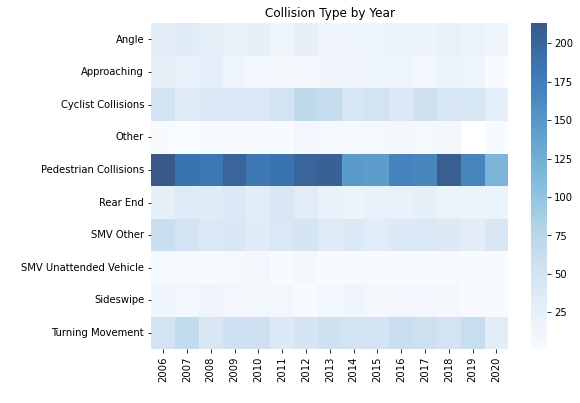

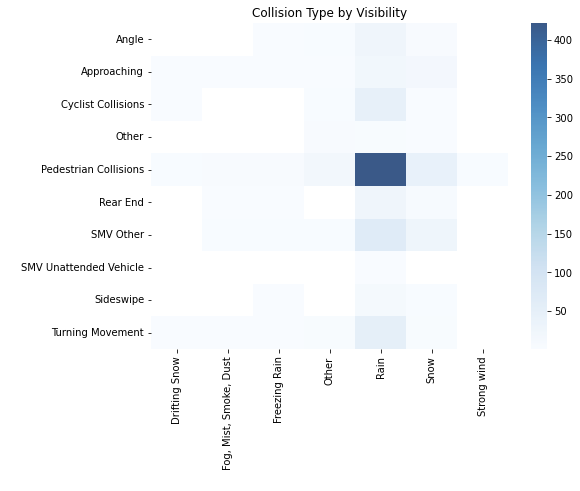

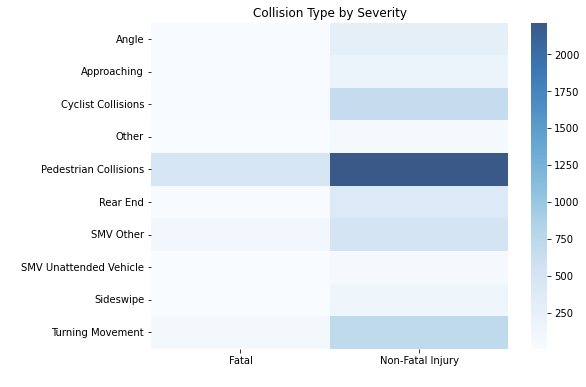

In [58]:
title = ['Collision Type by Year', 'Collision Type by Visibility', 'Collision Type by Severity']
ylabel = ['Year', 'Visibility', 'Severity']
t_data = [t1.T, t2, t3]

for t in zip(title, ylabel, t_data):
    plt.figure(figsize = (8,6))
    sns.heatmap(t[2], cmap='Blues', alpha=0.8)
    plt.title(t[0])
    plt.xlabel(' ')
    plt.ylabel(' ')

In [59]:
#Deleting Duplicates
df_seriously_injured=df_seriously_injured.drop_duplicates(subset=["ACCNUM"], keep="first")

In [60]:
#Dropping the column not playing any role in analysis: may cause noise
df_seriously_injured.drop(["OFFSET","DISTRICT","WARDNUM","DIVISION","ACCLOC","FATAL_NO","INITDIR","MANOEUVER","PEDTYPE","PEDACT","PEDCOND","CYCLISTYPE",'CYCACT','CYCCOND','PEDESTRIAN','CYCLIST','AUTOMOBILE','MOTORCYCLE','TRUCK','TRSN_CITY_VEH','EMERG_VEH','PASSENGER','POLICE_DIVISION','HOOD_ID','NEIGHBOURHOOD','ObjectId',"geometry2","DRIVACT","DRIVCOND","AG_DRIV","DISABILITY"], axis=1, inplace=True)
df_seriously_injured.head()

,ACCNUM,INVTYPE,INVAGE,INJURY_ID,VEHTYPE,SPEEDING,REDLIGHT,ALCOHOL,YEAR,DATE,TIME,HOUR,STREET1,STREET2,ROAD_CLASS_ID,LOCCOORD,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,ACCLASS,IMPACTYPE,Longitude,Latitude,BIKE_PED_COLLISION,Day_of_Week
0,25301,Driver,75 to 79,1.0,"Automobile, Station Wagon",NaN,NaN,NaN,2020,2020-01-04,1850,18,EGLINTON AVE E,BAYVIEW AVE,1.0,Intersection,Traffic Signal,Rain,Dark,Wet,Non-Fatal Injury,Pedestrian Collisions,-79.3771,43.7109,YES,Saturday
2,26294,Pedestrian,65 to 69,2.0,NaN,NaN,NaN,NaN,2020,2020-01-04,2214,22,256 JARVIS ST,NaN,1.0,Mid-Block,No Control,Clear,"Dark, artificial",Dry,Fatal,Pedestrian Collisions,-79.3755,43.6595,YES,Saturday
4,37330,Driver,50 to 54,1.0,"Automobile, Station Wagon",NaN,NaN,NaN,2020,2020-01-06,1555,15,DUNDAS ST W,SHERIDAN AVE,3.0,Intersection,Traffic Signal,Clear,"Dawn, artificial",Dry,Non-Fatal Injury,Pedestrian Collisions,-79.4336,43.6496,YES,Monday
6,45664,Driver,50 to 54,5.0,"Automobile, Station Wagon",NaN,NaN,NaN,2020,2020-01-07,1850,18,EGLINTON AVE E,PHARMACY AVE,1.0,Intersection,Traffic Signal,Clear,Dark,Dry,Non-Fatal Injury,Turning Movement,-79.2974,43.7255,NULL,Tuesday
9,56815,Driver,45 to 49,1.0,Delivery Van,Yes,Yes,NaN,2020,2020-01-09,1100,11,MARTIN GROVE RD,BELFIELD RD,1.0,Intersection,Traffic Signal,Clear,Daylight,Dry,Non-Fatal Injury,Angle,-79.5755,43.7018,NULL,Thursday


In [61]:
#Checkinf dataframe info again
df_seriously_injured.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6002 entries, 0 to 16856
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ACCNUM              6002 non-null   int64         
 1   INVTYPE             5994 non-null   object        
 2   INVAGE              6002 non-null   object        
 3   INJURY_ID           5310 non-null   float64       
 4   VEHTYPE             5584 non-null   object        
 5   SPEEDING            711 non-null    object        
 6   REDLIGHT            376 non-null    object        
 7   ALCOHOL             231 non-null    object        
 8   YEAR                6002 non-null   int64         
 9   DATE                6002 non-null   datetime64[ns]
 10  TIME                6002 non-null   int64         
 11  HOUR                6002 non-null   int64         
 12  STREET1             6002 non-null   object        
 13  STREET2             5425 non-null   object     

In [62]:
#Involvement Types invovled in total accidents 
df_involvement_type=pd.DataFrame(df_seriously_injured.groupby(["INVTYPE"],as_index=False)["ACCNUM"].count())
df_involvement_type

,INVTYPE,ACCNUM
0,Cyclist,167
1,Driver,3584
2,Driver - Not Hit,6
3,In-Line Skater,2
4,Moped Driver,13
5,Motorcycle Driver,347
6,Motorcycle Passenger,13
7,Other,42
8,Other Property Owner,24
9,Passenger,465


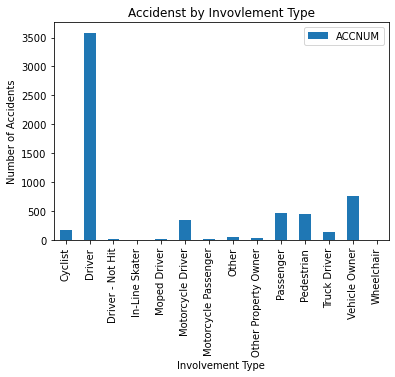

<Figure size 432x288 with 0 Axes>

In [63]:
# Create the plot.
df_involvement_type.plot("INVTYPE", "ACCNUM",kind="bar")
# Create labels for the x and y axes.
plt.xlabel("Involvement Type")
plt.ylabel("Number of Accidents")
# Create a title.
plt.title("Accidenst by Invovlement Type")
plt.xticks(rotation=90)
# Add the legend.
plt.legend()
plt.show()
plt.tight_layout()

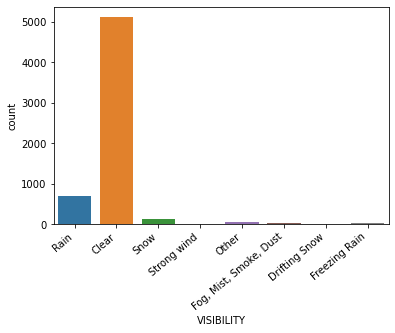

In [64]:
# VISIBILITY FACTOR COUNT
wplot = sns.countplot(data=df_seriously_injured,x="VISIBILITY")
wplot.set_xticklabels(wplot.get_xticklabels(), rotation=40, ha="right")
plt.show()

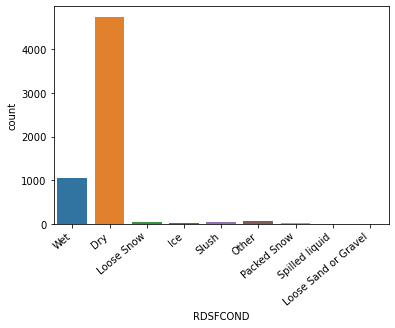

In [65]:
# ROAD CONDITION FACTOR
wplot = sns.countplot(data=df_seriously_injured,x="RDSFCOND")
wplot.set_xticklabels(wplot.get_xticklabels(), rotation=40, ha="right")
plt.show()

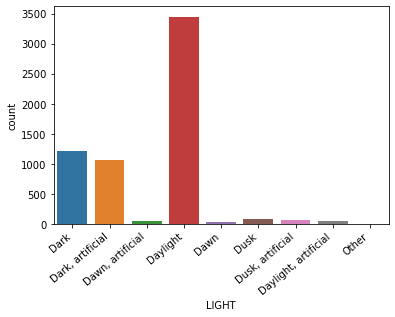

In [66]:
# LIGHT FACTOR COUNT
wplot = sns.countplot(data=df_seriously_injured,x="LIGHT")
wplot.set_xticklabels(wplot.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [67]:
#Total number of accidenst due to Visibity issue and if they were Fatal or not.
df_visibility=pd.DataFrame(df_seriously_injured.groupby(["VISIBILITY","ACCLASS"],as_index=False)["ACCNUM"].count())
df_visibility

,VISIBILITY,ACCLASS,ACCNUM
0,Clear,Fatal,677
1,Clear,Non-Fatal Injury,4437
2,Clear,Property Damage Only,1
3,Drifting Snow,Non-Fatal Injury,7
4,"Fog, Mist, Smoke, Dust",Fatal,3
5,"Fog, Mist, Smoke, Dust",Non-Fatal Injury,13
6,Freezing Rain,Fatal,1
7,Freezing Rain,Non-Fatal Injury,14
8,Other,Fatal,19
9,Other,Non-Fatal Injury,22


In [68]:
#Remove outliers
df_seriously_injured.drop(df_seriously_injured.loc[df_seriously_injured['ACCLASS'] == "Property Damage Only"].index, inplace=True)

<AxesSubplot:xlabel='ACCLASS'>

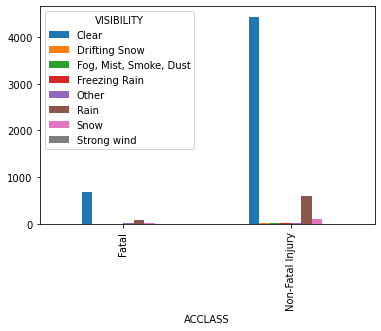

In [69]:
#Creating bar chart for Visibility
df_visibility=pd.DataFrame(df_seriously_injured.groupby(["VISIBILITY","ACCLASS"],as_index=False)["ACCNUM"].count())
df_visibility.pivot_table(index="ACCLASS",columns="VISIBILITY").plot(kind="bar",y="ACCNUM")

In [70]:
#####Total number of accidenst due to Visibity issue and if they were Fatal or not.
df_alcohol=pd.DataFrame(df_seriously_injured.groupby(["ALCOHOL","ACCLASS"],as_index=False)["ACCNUM"].count())
df_alcohol

,ALCOHOL,ACCLASS,ACCNUM
0,Yes,Fatal,36
1,Yes,Non-Fatal Injury,195


In [71]:
#Total number of accidenst due to Visibity issue and if they were Fatal or not.
df_speeding=pd.DataFrame(df_seriously_injured.groupby(["SPEEDING","ACCLASS"],as_index=False)["ACCNUM"].count())
df_speeding

,SPEEDING,ACCLASS,ACCNUM
0,Yes,Fatal,154
1,Yes,Non-Fatal Injury,556


In [72]:
#Total number of accidenst due to Visibity issue and if they were Fatal or not.
df_RedLight=pd.DataFrame(df_seriously_injured.groupby(["REDLIGHT","ACCLASS"],as_index=False)["ACCNUM"].count())
df_RedLight

,REDLIGHT,ACCLASS,ACCNUM
0,Yes,Fatal,51
1,Yes,Non-Fatal Injury,325


In [73]:
#Total number of accidenst due to Road Condition and if they were Fatal or not.
df_roadcondition=pd.DataFrame(df_seriously_injured.groupby(["RDSFCOND","ACCLASS"],as_index=False)["ACCNUM"].count())
df_roadcondition

,RDSFCOND,ACCLASS,ACCNUM
0,Dry,Fatal,621
1,Dry,Non-Fatal Injury,4123
2,Ice,Fatal,1
3,Ice,Non-Fatal Injury,21
4,Loose Sand or Gravel,Non-Fatal Injury,4
5,Loose Snow,Fatal,4
6,Loose Snow,Non-Fatal Injury,48
7,Other,Fatal,22
8,Other,Non-Fatal Injury,36
9,Packed Snow,Fatal,4


<AxesSubplot:xlabel='ACCLASS'>

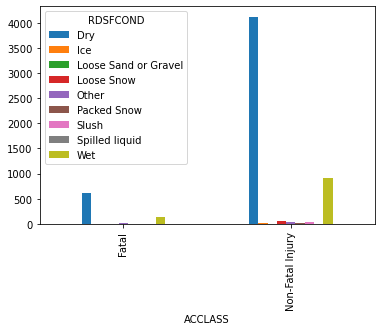

In [74]:
#Creating Bar chart for road condition
df_roadcondition.pivot_table(index="ACCLASS",columns="RDSFCOND").plot(kind="bar",y="ACCNUM")

In [75]:
#Total number of accidenst due to Light Condition and if they were Fatal or not.
df_light=pd.DataFrame(df_seriously_injured.groupby(["LIGHT","ACCLASS"],as_index=False)["ACCNUM"].count())
df_light

,LIGHT,ACCLASS,ACCNUM
0,Dark,Fatal,198
1,Dark,Non-Fatal Injury,1007
2,"Dark, artificial",Fatal,156
3,"Dark, artificial",Non-Fatal Injury,912
4,Dawn,Fatal,5
5,Dawn,Non-Fatal Injury,31
6,"Dawn, artificial",Fatal,9
7,"Dawn, artificial",Non-Fatal Injury,29
8,Daylight,Fatal,408
9,Daylight,Non-Fatal Injury,3040


<AxesSubplot:xlabel='ACCLASS'>

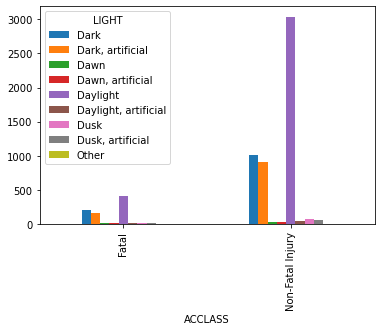

In [76]:
#Creating Bar chart for Light
df_light.pivot_table(index="ACCLASS",columns="LIGHT").plot(kind="bar",y="ACCNUM")

In [77]:
#Total number of accidenst based on the Impact Type
df_impact_type=pd.DataFrame(df_seriously_injured.groupby(["IMPACTYPE"],as_index=False)["ACCNUM"].count())
df_impact_type

,IMPACTYPE,ACCNUM
0,Angle,308
1,Approaching,228
2,Cyclist Collisions,706
3,Other,68
4,Pedestrian Collisions,2676
5,Rear End,413
6,SMV Other,619
7,SMV Unattended Vehicle,62
8,Sideswipe,136
9,Turning Movement,784


<AxesSubplot:xlabel='IMPACTYPE'>

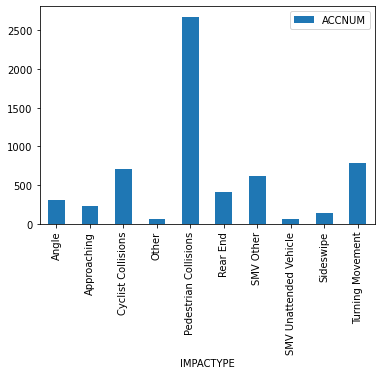

In [78]:
#Creating bar chart for IMPACT Type
df_impact_type.plot("IMPACTYPE","ACCNUM",kind="bar")

In [79]:
#On which hour of the day we have most accident 
df_hourofthedayaccident=pd.DataFrame(df_seriously_injured.groupby(["HOUR"])["ACCNUM"].count())
df_hourofthedayaccident

,ACCNUM
HOUR,
0,173
1,144
2,161
3,134
4,61
5,104
6,203
7,210
8,242


<AxesSubplot:ylabel='HOUR'>

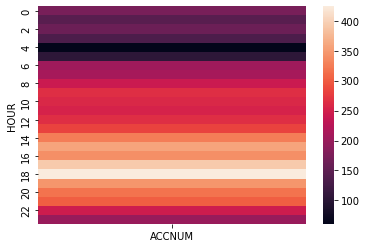

In [80]:
sns.heatmap(df_hourofthedayaccident)

In [81]:
#In which year we have most accident 
df_Yearofaccident=pd.DataFrame(df_seriously_injured.groupby(["YEAR"])["ACCNUM"].count())
df_Yearofaccident

,ACCNUM
YEAR,
2006,481
2007,453
2008,417
2009,438
2010,400
2011,399
2012,453
2013,431
2014,350


<AxesSubplot:ylabel='YEAR'>

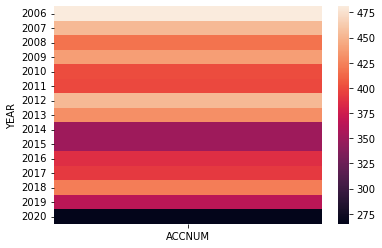

In [82]:
sns.heatmap(df_Yearofaccident)

In [83]:
#How many accidents based on Road Classification
df_road_type=pd.DataFrame(df_seriously_injured.groupby("ROAD_CLASS_ID",as_index=False)["ACCNUM"].count())
df_road_type

,ROAD_CLASS_ID,ACCNUM
0,1.0,4141
1,2.0,369
2,3.0,982
3,4.0,307
4,5.0,9
5,6.0,3
6,7.0,4
7,8.0,19
8,9.0,2
9,10.0,1


In [84]:
##Merging Road Class and Seriously Injured tables
df_road_type=pd.merge(df_road_type,df_road_class,how='left',on=['ROAD_CLASS_ID'])
df_road_type

,ROAD_CLASS_ID,ACCNUM,ROAD_CLASS
0,1.0,4141,Major Arterial
1,2.0,369,Collector
2,3.0,982,Minor Arterial
3,4.0,307,Local
4,5.0,9,Other
5,6.0,3,Pending
6,7.0,4,Laneway
7,8.0,19,Expressway
8,9.0,2,Expressway Ramp
9,10.0,1,Major Arterial Ramp


In [85]:
#Remove outliers
df_road_type.drop(df_road_type.loc[df_road_type['ACCNUM'] <20].index, inplace=True)

<AxesSubplot:xlabel='ROAD_CLASS'>

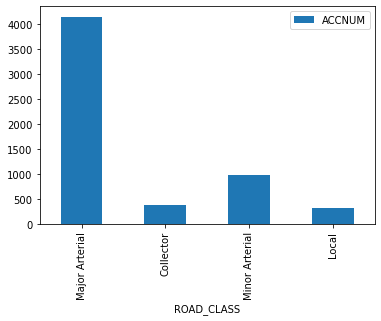

In [86]:
#Bar graph to shoulw total number of accidents based on Road Classification
df_road_type.plot("ROAD_CLASS","ACCNUM",kind="bar")

In [87]:
#Extracting Month from Date
df_seriously_injured['Month'] = df_seriously_injured['DATE'].dt.month_name()

In [88]:
#Extracting Week from Date
df_seriously_injured["Day_of_Week"]=df_seriously_injured["DATE"].dt.day_name()

# CREATING HEADMAP OF ACCIDENT DATA BY YEAR AND MONTH

In [89]:
def RTAs_by_month(df, month):
    month_list = []
    mon, tues, wed, thurs, fri, sat, sun = 0,0,0,0,0,0,0
    
    for idx, row in df.iterrows():
        if row["Month"] == month and row["Day_of_Week"] == "Monday": mon +=1
        elif row["Month"] == month and row["Day_of_Week"] == "Tuesday": tues +=1
        elif row["Month"] == month and row["Day_of_Week"] == "Wednesday": wed +=1
        elif row["Month"] == month and row["Day_of_Week"] == "Thursday": thurs +=1
        elif row["Month"] == month and row["Day_of_Week"] == "Friday": fri +=1
        elif row["Month"] == month and row["Day_of_Week"] == "Saturday": sat +=1
        elif row["Month"] == month and row["Day_of_Week"] == "Sunday": sun +=1
        else: a=0 

    month_list.append(mon)
    month_list.append(tues)
    month_list.append(wed)
    month_list.append(thurs)
    month_list.append(fri)
    month_list.append(sat)
    month_list.append(sun)
    
    total = mon+tues+wed+thurs+fri+sat+sun
    
    return(month_list)

In [90]:
#Extract RTA data for each day by month
january = RTAs_by_month(df_seriously_injured, "January")
february = RTAs_by_month(df_seriously_injured, "February")
march = RTAs_by_month(df_seriously_injured, "March")
april = RTAs_by_month(df_seriously_injured, "April")
may = RTAs_by_month(df_seriously_injured, "May")
june = RTAs_by_month(df_seriously_injured, "June")
july = RTAs_by_month(df_seriously_injured, "July")
august = RTAs_by_month(df_seriously_injured, "August")
september = RTAs_by_month(df_seriously_injured, "September")
october = RTAs_by_month(df_seriously_injured, "October")
november = RTAs_by_month(df_seriously_injured, "November")
december = RTAs_by_month(df_seriously_injured, "December")

In [91]:
#Create matrix for the heatmap
columns = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
rows = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
data = np.array([january, february, march, april, may, june, july, august, september, october, november, december])
heatmap_df = pd.DataFrame(data=data, index=rows, columns=columns)

In [92]:
heatmap_df

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
January,56,78,54,53,80,52,56
February,52,51,54,55,47,56,48
March,58,53,73,53,68,58,46
April,58,64,64,53,57,59,48
May,59,76,79,76,71,68,59
June,68,99,88,97,78,83,84
July,86,69,81,73,94,60,70
August,71,90,68,88,110,93,67
September,83,91,90,84,90,85,87
October,94,77,96,87,92,71,68


Text(0.5, 1.0, 'Traffic Accidents by week for each month from 2014-2020')

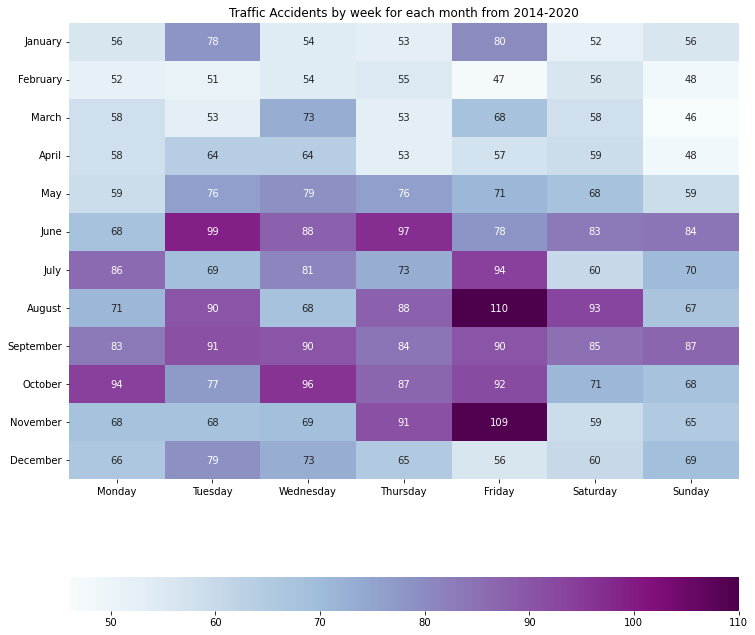

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,12))
map1 = sns.heatmap(heatmap_df, annot=True, fmt="d", cmap='BuPu', cbar_kws={"orientation": "horizontal"} )
map1.set_title("Traffic Accidents by week for each month from 2014-2020")

In [95]:
#Exporting cleaned data to csv
df_seriously_injured.to_csv("Resources/df_seriously_injured.csv",index=False)